***Q-2. Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using any 4 different classification algorithms. Now you have to build a model which can classify people into different classes. 
Dataset This is the Dataset You can use this dataset for this question.***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df= pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [20]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [21]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [22]:
# Check the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (2111, 17)


In [23]:
# Check the summary statistics of numerical features
print("\nSummary statistics of numerical features:\n", data.describe())


Summary statistics of numerical features:
                Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%    

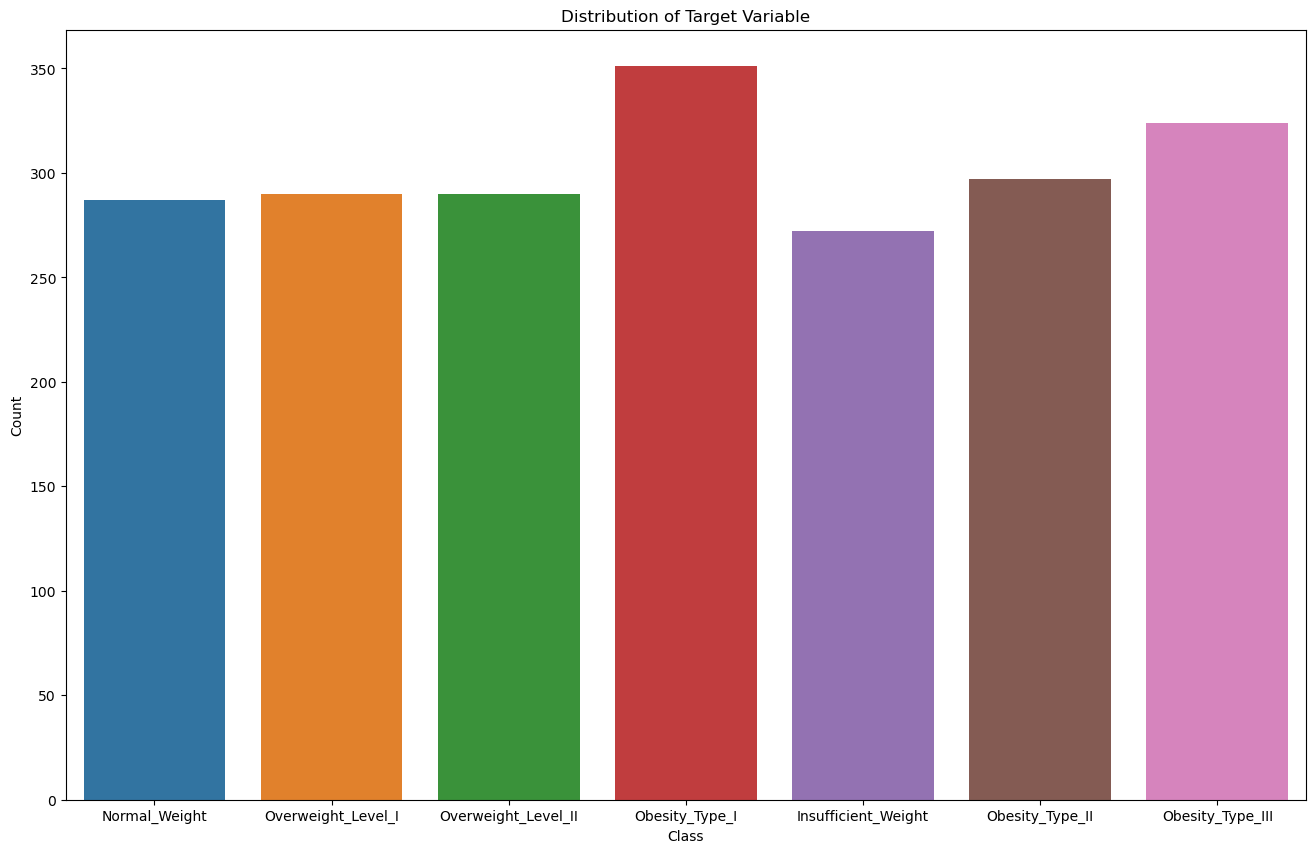

In [31]:
# Check the distribution of the target variable
plt.figure(figsize=(16, 10))
sns.countplot(x="NObeyesdad", data=data)
plt.title("Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


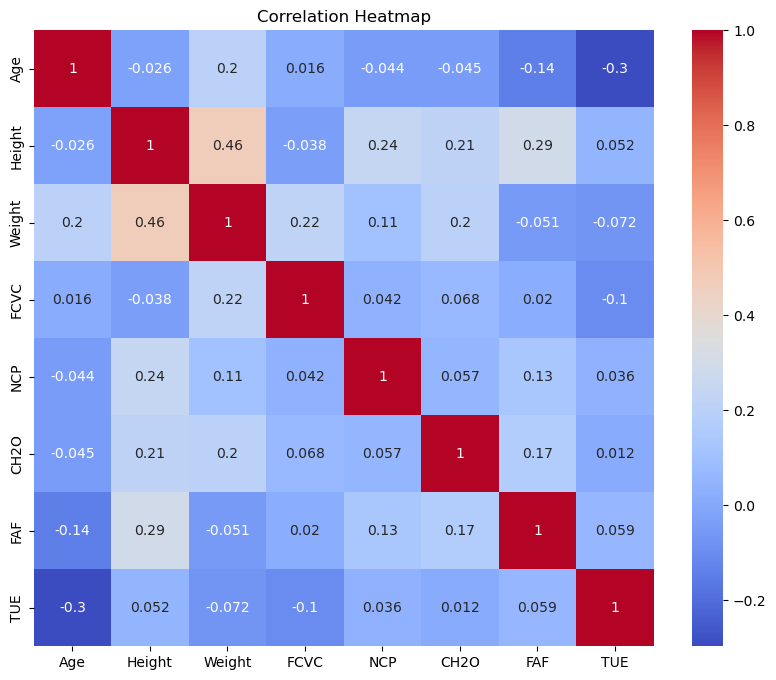

In [32]:
# Check the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

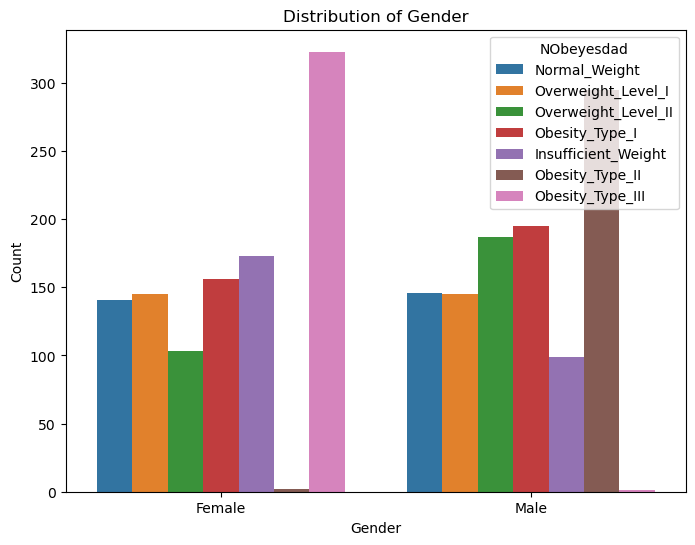

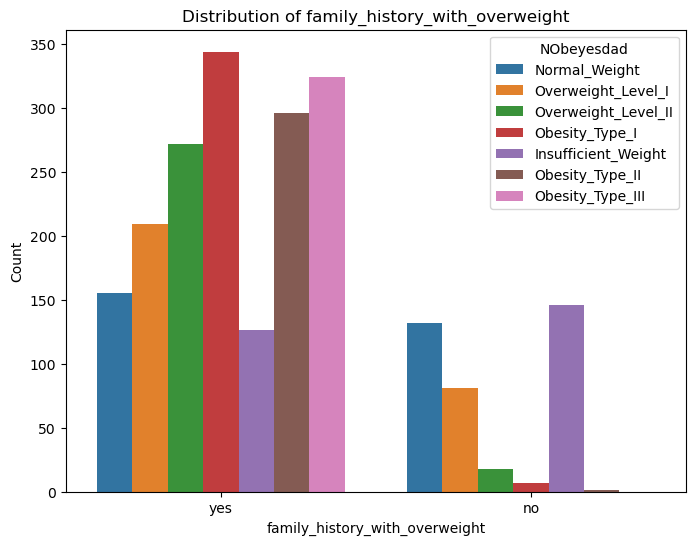

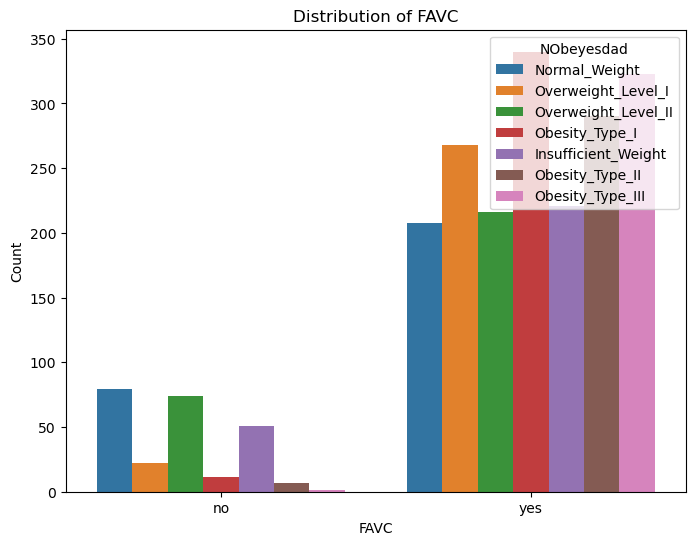

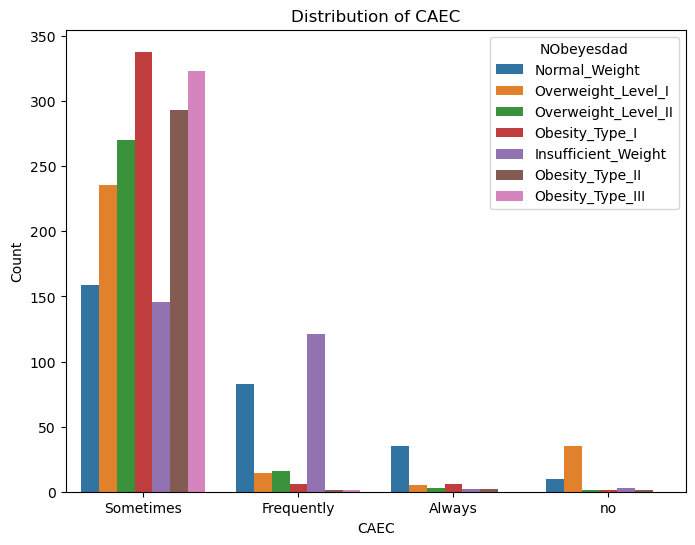

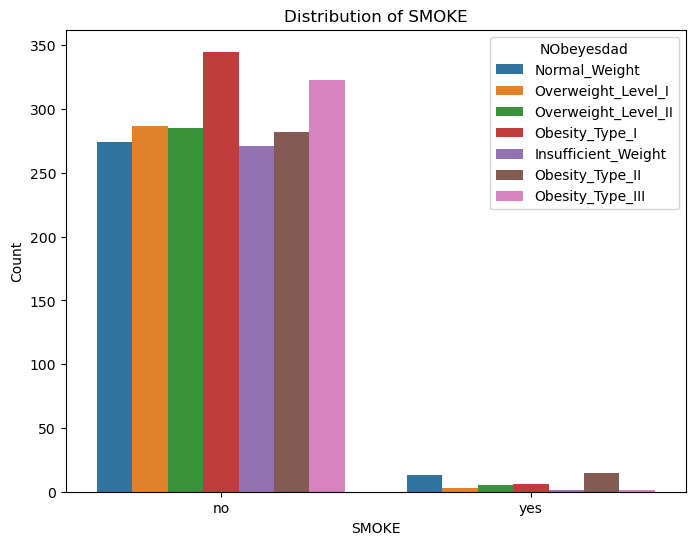

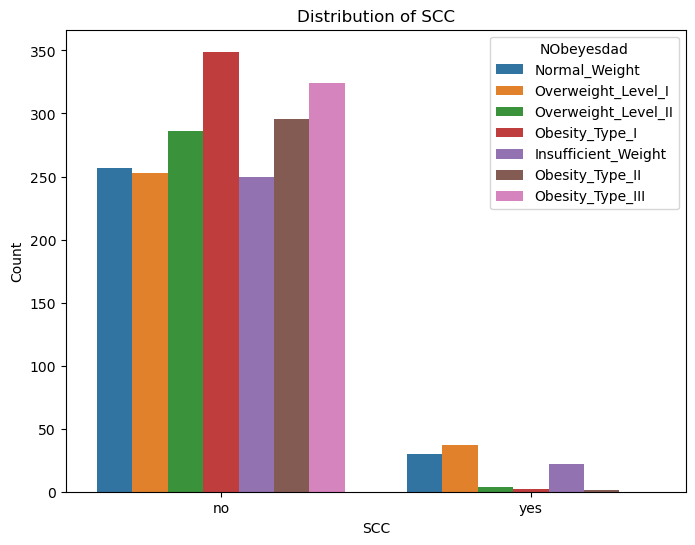

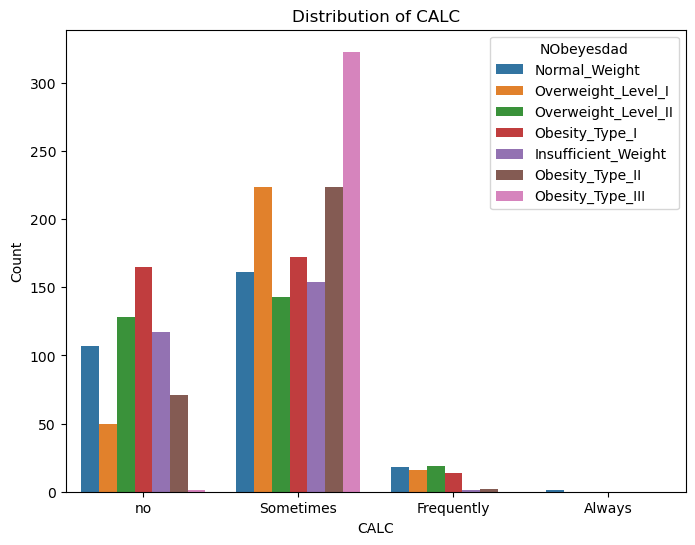

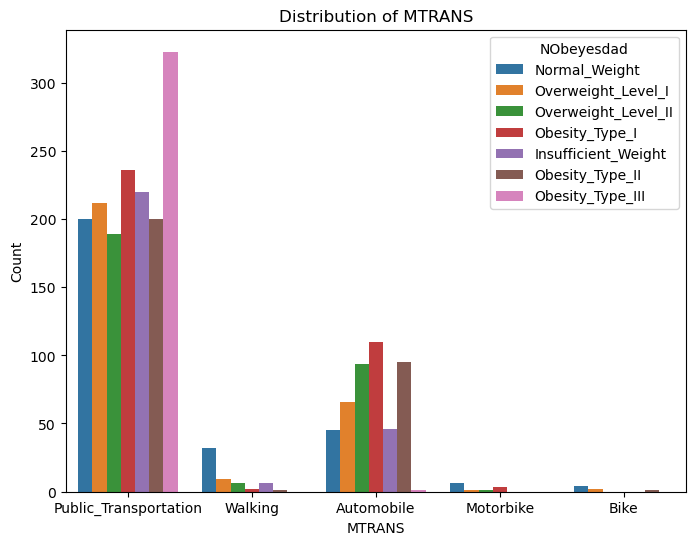

In [33]:
# Exploring categorical features
categorical_features = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue="NObeyesdad", data=data)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="NObeyesdad", loc="upper right")
    plt.show()


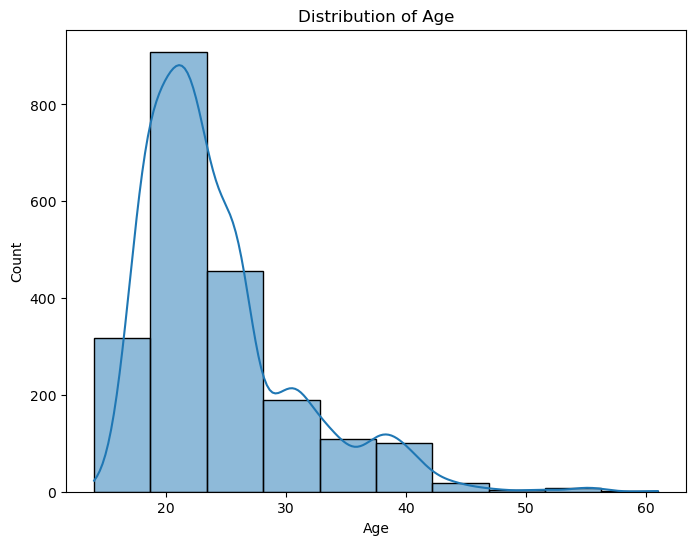

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data["Age"], bins=10, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

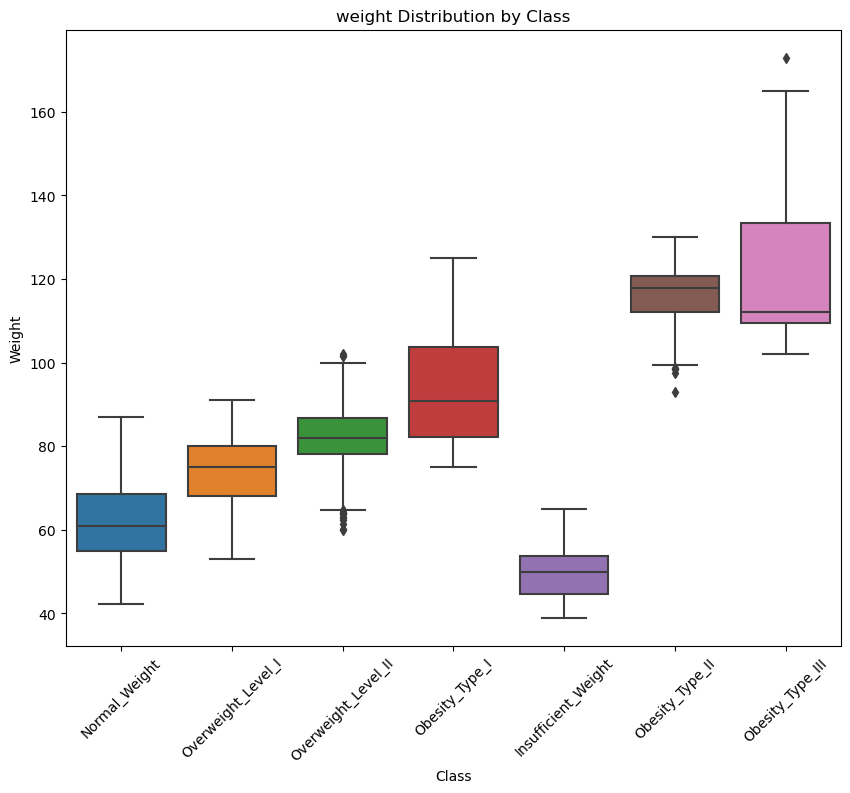

In [35]:
# Compare the BMI distribution across different classes
plt.figure(figsize=(10, 8))
sns.boxplot(x="NObeyesdad", y="Weight", data=data)
plt.title("weight Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.show()

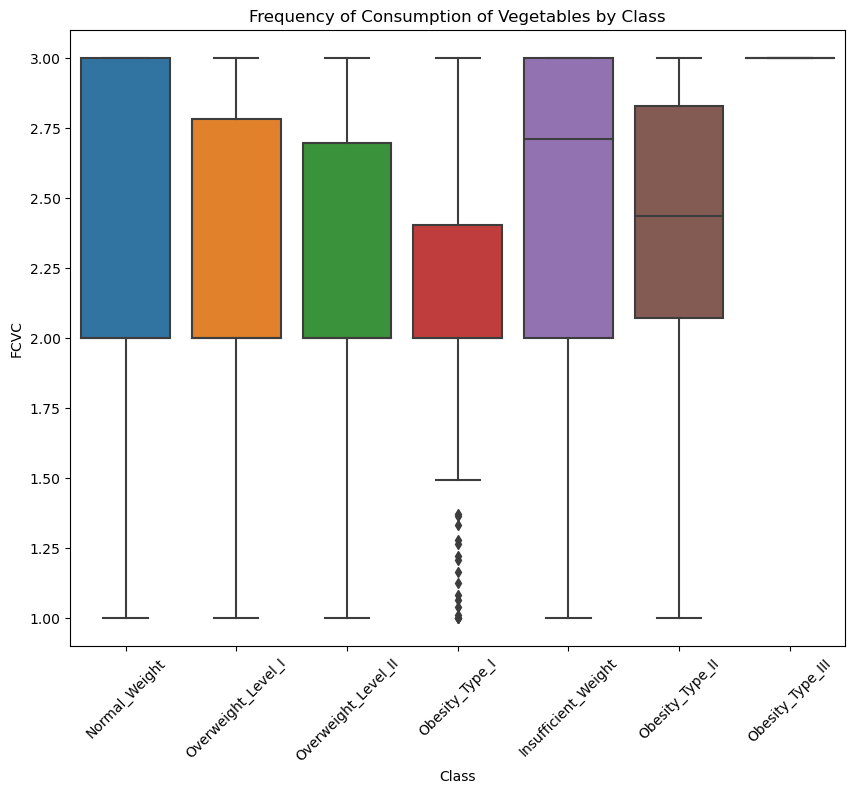

In [36]:
 #Box plot of FCVC (Frequency of consumption of vegetables)
plt.figure(figsize=(10, 8))
sns.boxplot(x="NObeyesdad", y="FCVC", data=data)
plt.title("Frequency of Consumption of Vegetables by Class")
plt.xlabel("Class")
plt.ylabel("FCVC")
plt.xticks(rotation=45)
plt.show()

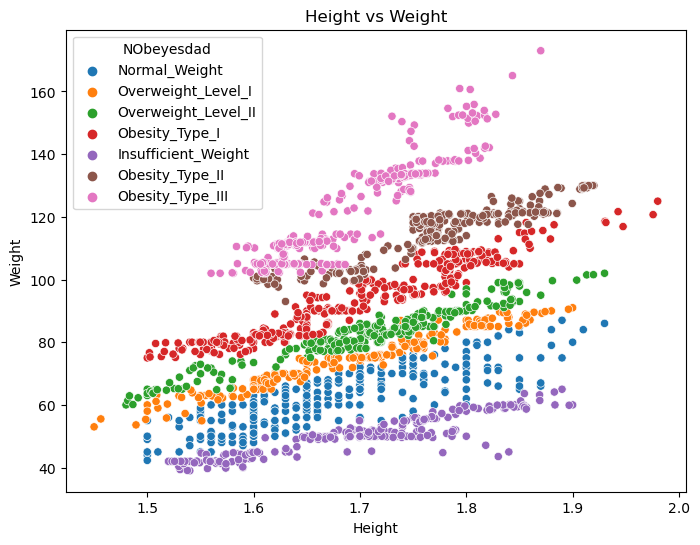

In [37]:
# Visualize the relationship between height and weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Height", y="Weight", hue="NObeyesdad", data=data)
plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

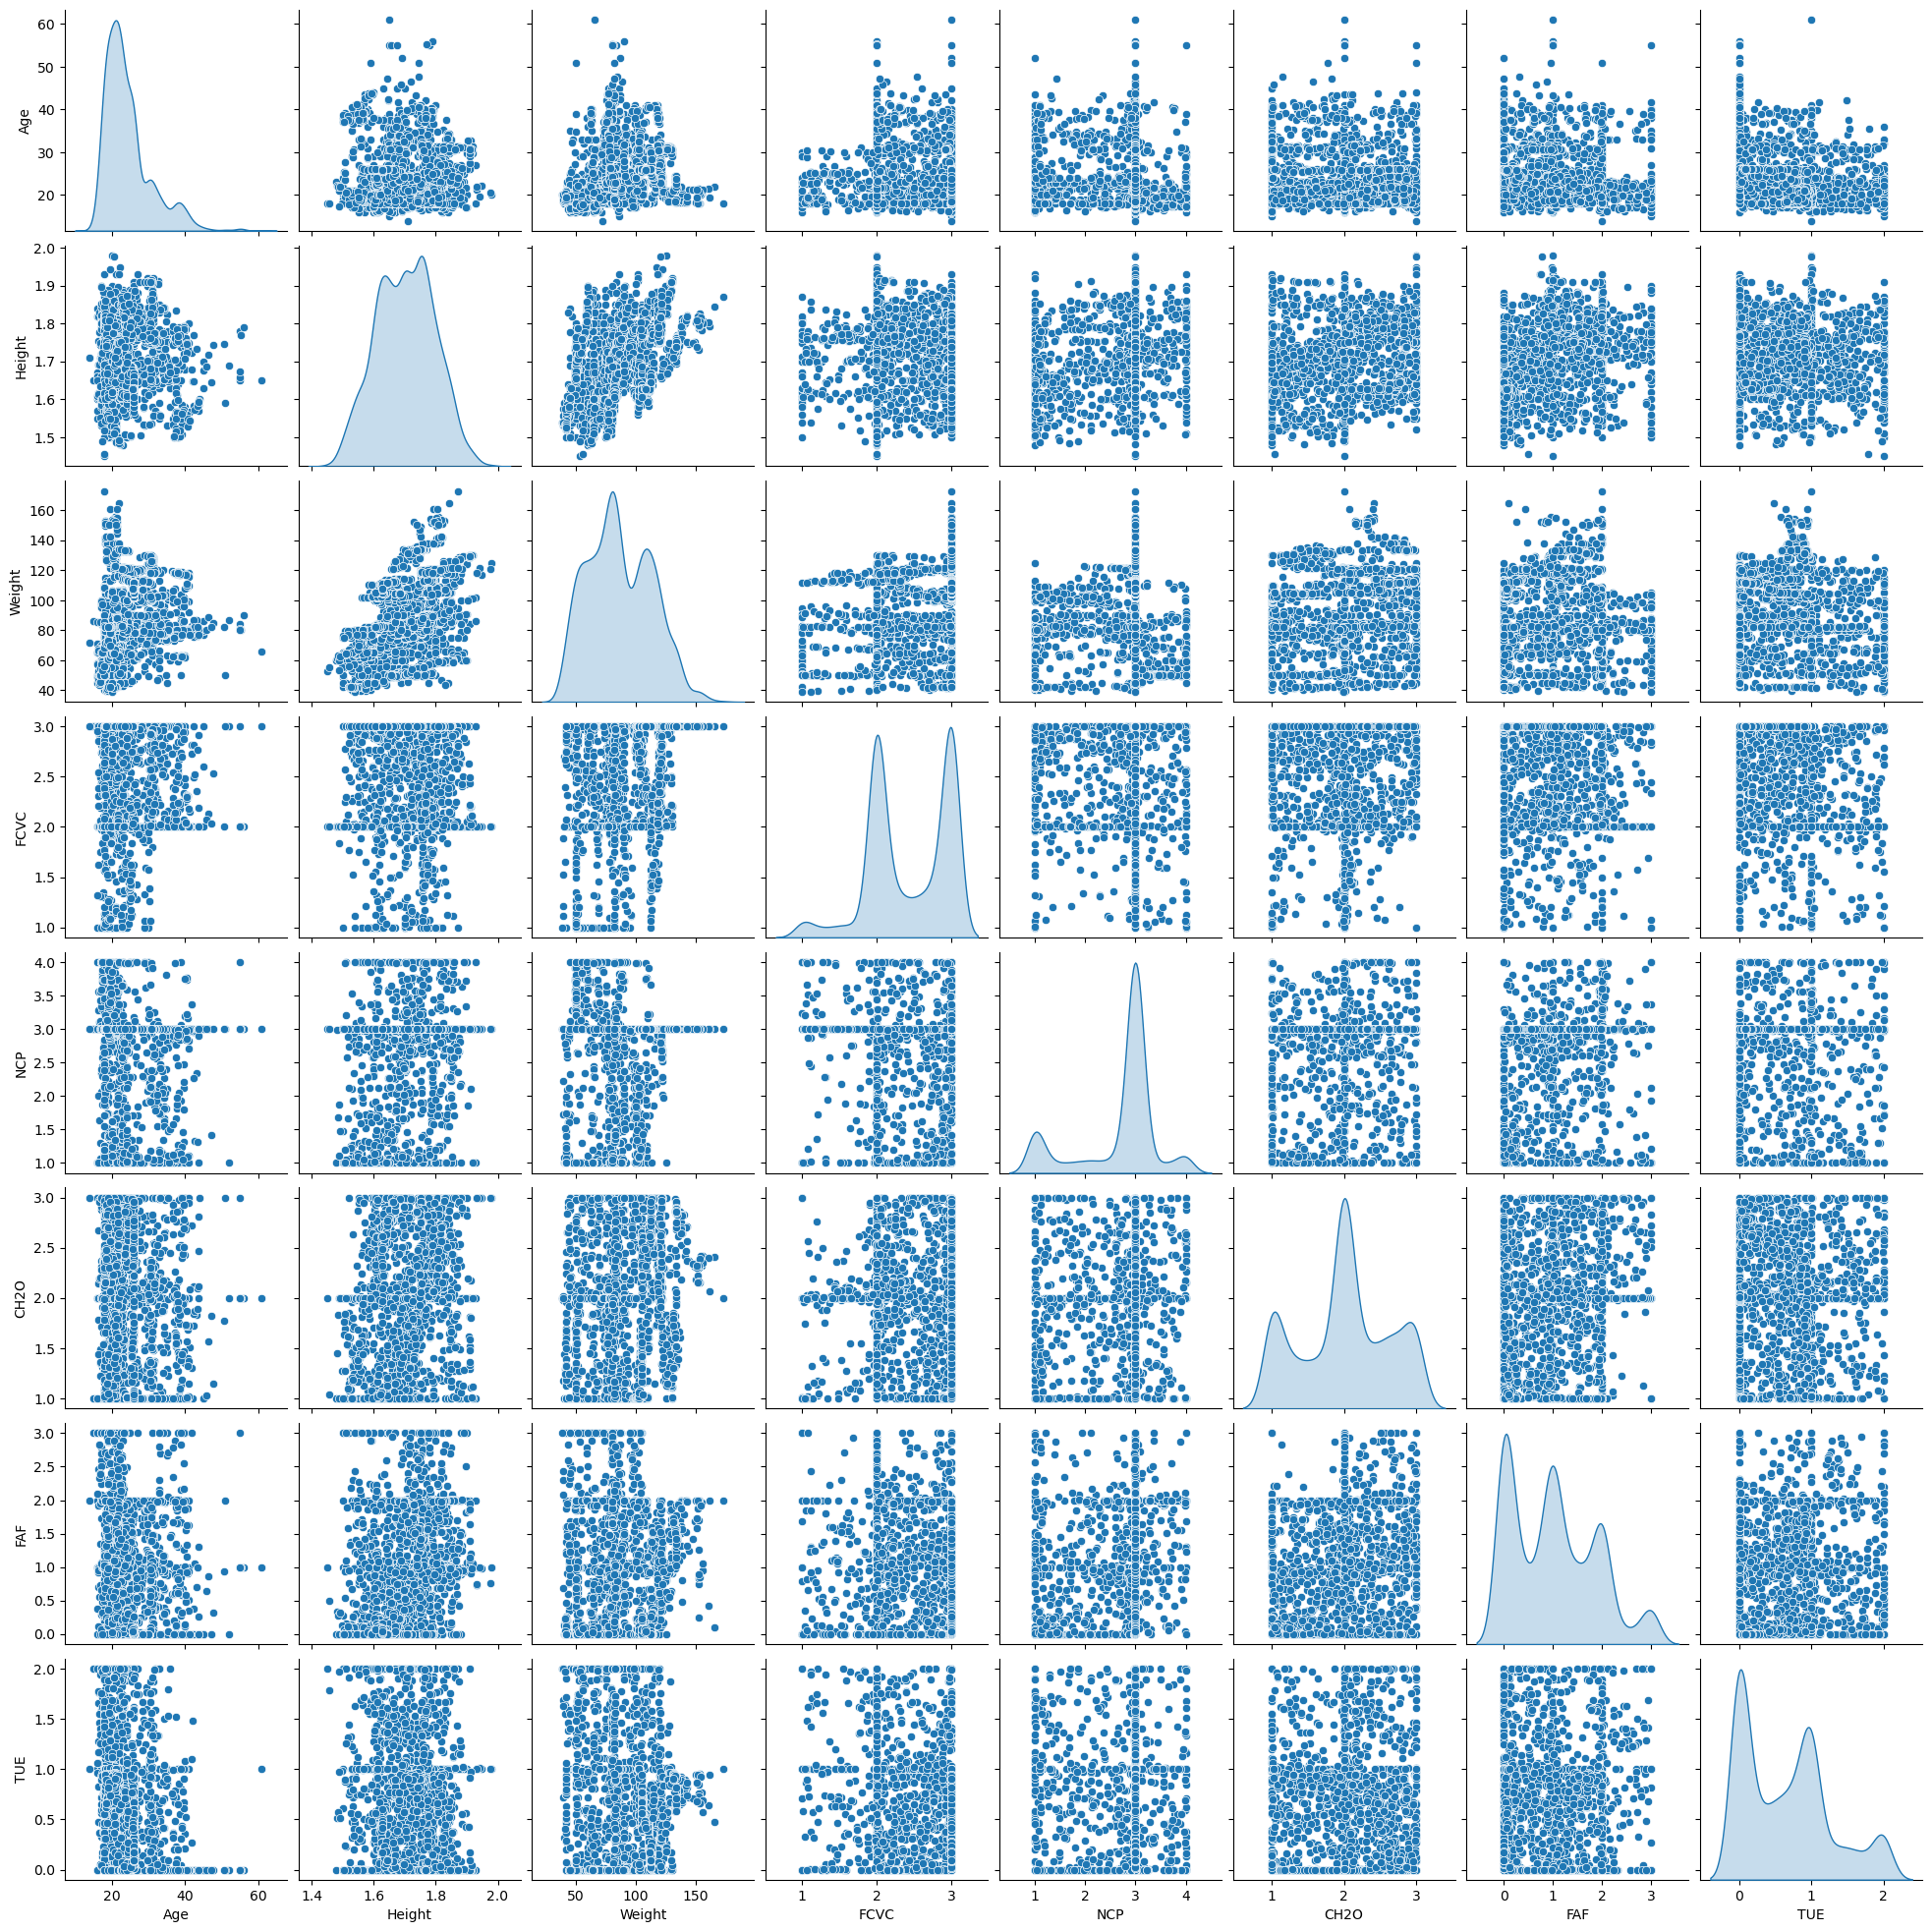

In [38]:
# Pairplot of numerical features
numerical_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
sns.pairplot(data[numerical_features], diag_kind="kde")
plt.show()

In [39]:
# Convert categorical variables to numerical labels
le = LabelEncoder()
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["family_history_with_overweight"] = le.fit_transform(data["family_history_with_overweight"])
data["FAVC"] = le.fit_transform(data["FAVC"])
data["CAEC"] = le.fit_transform(data["CAEC"])
data["SMOKE"] = le.fit_transform(data["SMOKE"])
data["SCC"] = le.fit_transform(data["SCC"])
data["CALC"] = le.fit_transform(data["CALC"])
data["MTRANS"] = le.fit_transform(data["MTRANS"])
data["NObeyesdad"] = le.fit_transform(data["NObeyesdad"])

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop("NObeyesdad", axis=1), data["NObeyesdad"], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
import warnings 
warnings.filterwarnings('ignore')
# Train and evaluate the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Train and evaluate the K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))

# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

# Train and evaluate the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.91      0.63      0.74        62
           2       0.93      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.77      0.79      0.78        56
           6       0.76      0.84      0.80        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423

K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        56
           1       0.67      0.45      0.54        62
           2       0.84      0.92      0.88        78
           3       0.92      0.98      0.95        58
           4       0.98      1.00      0.99        63
           5       0.84      0.68 